<a href="https://colab.research.google.com/github/tudi72/ECG_classification_AutoML/blob/main/27_septembrie_ecg_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# READING DATA

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# link = "https://drive.google.com/file/d/1aHdFqb_mAxsF-gywZpzX4-aaCFGZ9vVQ/view?usp=sharing"
# fluff, id = link.split('=')
id = "1aHdFqb_mAxsF-gywZpzX4-aaCFGZ9vVQ"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data_8.csv')  


In [ ]:
import pandas as pd
df_global = pd.read_csv('data_8.csv')
# df_train = pd.read_csv('data_8_train.csv')
# df_test = pd.read_csv('data_8_test.csv')

# SPLIT DATA into Train and Test

In [ ]:
# print(df_train['Type'].value_counts())
# print(df_test['Type'].value_counts())
print(df_global['Type'].value_counts())

0    76557
1    29107
Name: Type, dtype: int64


In [ ]:
# MLII_X_train = df_train.iloc[:,5:55].values
# MLII_y_train = df_train['Type'].values.reshape(-1,1)

# MLII_X_test = df_test.iloc[:,5:55].values
# MLII_y_test = df_test['Type'].values.reshape(-1,1)

In [ ]:
# import numpy as np
# unique, counts = np.unique(MLII_y_test,return_counts=True)

# print('Test - Healthy\t',counts[0],' Sick\t',counts[1])
# unique, counts = np.unique(MLII_y_train,return_counts=True)
# print('Train - Healthy\t',counts[0],' Sick\t',counts[1])


Test - Healthy	 20548  Sick	 7653
Train - Healthy	 59952  Sick	 21822


In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn
!pip install mljar-supervised
for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

In [ ]:
from sklearn.model_selection import StratifiedKFold,train_test_split
from supervised.automl import AutoML
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# K fold cross validation
#
strtfdKFold = StratifiedKFold(n_splits=10)

MLII_X_global = df_global.iloc[:,5:55]
MLII_y_global = df_global['Type']

X_train, X_test, y_train, y_test = train_test_split(MLII_X_global, MLII_y_global, random_state=0, train_size = .75)
kfold = strtfdKFold.split(X_train, y_train)


In [ ]:
y_train.value_counts()

0    57461
1    21787
Name: Type, dtype: int64

In [ ]:
automl = AutoML(validation_strategy = {
    "validation_type": "kfold",
    "k_folds": 5,
    "shuffle": True,
    "stratify": True,
    "random_seed": 123
},eval_metric = auc)


automl.fit(X_train,y_train)


Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is binary_classification with evaluation metric user_defined_metric
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
There was an error during 1_Baseline training.
Please check AutoML_4/errors.md for details.
There was an error during 2_DecisionTree training.
Please check AutoML_4/errors.md for details.
* Step default_algorithms will try to check up to 3 models


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.


There was an error during 1_Default_Xgboost training.
Please check AutoML_4/errors.md for details.
There was an error during 2_Default_NeuralNetwork training.
Please check AutoML_4/errors.md for details.
There was an error during 3_Default_RandomForest training.
Please check AutoML_4/errors.md for details.
[ERROR] [2022-09-27 21:34:51,438:supervised.exceptions] No models produced. 
Please check your data or submit a Github issue at https://github.com/mljar/mljar-supervised/issues/new.


AutoMLException: ignored

In [ ]:
train_accuracy = accuracy_score(X_train, y_train)

In [ ]:


# automl = AutoML()
# MLII_X_train_automl = df_train.iloc[:,5:55]
# MLII_y_train_automl = df_train['Type']

# MLII_X_test_automl = df_test.iloc[:,5:55]
# MLII_y_test_automl = df_test['Type']


# model_automl = AutoML()
# model_automl.fit(MLII_X_train_automl, MLII_y_train_automl)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.580126 trained in 1.13 seconds
[WARNING] [2022-09-27 18:34:45,896:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
[WARNING] [2022-09-27 18:34:53,085:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
[WARNING] [2022-09-27 18:34:53,102:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
[WARNING] [2022-09-27 18:34:54,082:matplotlib.font_manager] findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2_DecisionTree logloss 0.35

AutoML()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [ ]:
# compute the accuracy on test data
predictions_y_test_automl = model_automl.predict_all(MLII_X_test_automl)

In [ ]:
print(predictions_y_test_automl.tail())

       prediction_0  prediction_1  label
28196      0.922219      0.077781      0
28197      0.818549      0.181451      0
28198      0.982662      0.017338      0
28199      0.980275      0.019725      0
28200      0.883157      0.116843      0


In [ ]:

accuracy_test = accuracy_score(MLII_y_test_automl,predictions_y_test_automl["label"])
MSE =  mean_squared_error(MLII_y_test_automl,predictions_y_test_automl["label"])

print("Test accuracy:", accuracy_test)
print("Test MSE:",MSE)

Test accuracy: 0.6385234566150136
Test MSE: 0.36147654338498636


In [ ]:
from autosklearn.classification import AutoSklearnClassifier

model = AutoSklearnClassifier(time_left_for_this_task=20*60,memory_limit= 30000)

model.fit(MLII_X_train,MLII_y_train)


[WARNING] [2022-09-27 19:54:05,612:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2022-09-27 19:56:06,873:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2022-09-27 19:58:08,148:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      memory_limit=30000, per_run_time_limit=120,
                      time_left_for_this_task=1200)

In [ ]:
MLII_y_pred_test = model.predict(MLII_X_test)
MLII_y_pred_train = model.predict(MLII_X_train)


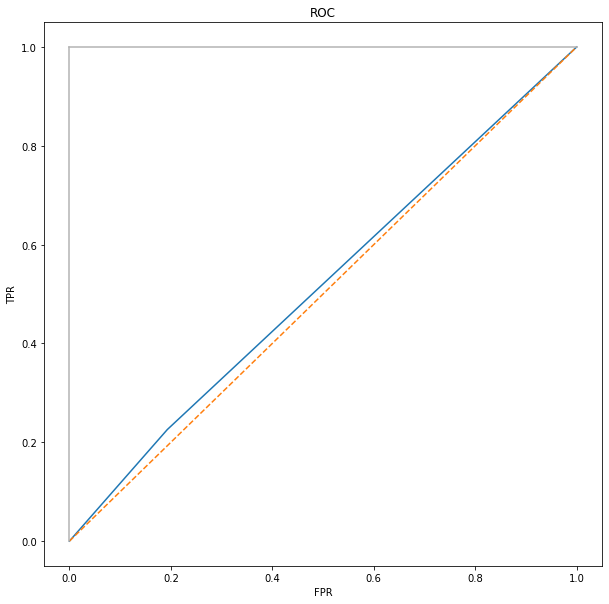

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt 

fpr, tpr, thresholds = roc_curve(MLII_y_test, MLII_y_pred)
AUC = auc(fpr, tpr)

plt.subplots(1, figsize=(10,10))
plt.title('ROC')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_train = accuracy_score(MLII_y_train, MLII_y_pred_train)
accuracy_test = accuracy_score(MLII_y_test, MLII_y_pred_test)

tn,fp,fn,tp = confusion_matrix(MLII_y_test,MLII_y_pred).ravel()
Recall = tp / (tp+fp)
Sensitivity = tp / (tp + tn)


print('Recall   \t\t',TPR)
print('Sensitivity\t\t',FPR)
print('AUC      \t\t',AUC)
print('Accuracy test\t\t',accuracy_test)
print('Accuracy train\t\t',accuracy_train)


Recall   		 0.30346160604463185
Sensitivity		 0.17609951132829854
AUC      		 0.5163744932047576
Accuracy test		 0.6570688982660189
Accuracy train		 0.8914080270012473


In [ ]:
print(model.leaderboard())

          rank  ensemble_weight           type      cost    duration
model_id                                                            
9            1             0.46            sgd  0.155117    6.117559
11           2             0.54  random_forest  0.183132  106.965329
